<h1> Projet–Fouille de Données
Thème : Classification des Tweets

## Installation des dépendances

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

In [52]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eyakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eyakr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
import os
print(os.getcwd())  # Affiche le répertoire de travail actuel

C:\Users\Eyakr


## Récupération du Dataset depuis Kaggle

In [55]:
!pip install kaggle
import pandas as pd
data = pd.read_csv("C:/Users/Eyakr/anaconda3/anaconda4/chatgpt_daily_tweets.csv", encoding="latin-1")
# Aperçu des premières lignes
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1.642889622681432e+18,2023-04-03 13:59:44+00:00,2023-04-08 01:07:02.538242,RT @jexep: à¹à¸à¸à¸à¸´à¸à¸à¸¶à¸à¸ à¸²à¸...,th,4706577259,ð·ð¼ â¡ #GOT7,BPawarisa1a,à¹à¸à¹à¸Jacksonwang,@JacksonWang852 â à¸£à¸µà¸§à¸´à¸§ #à¸£à¸µà¸§...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,NaN,13640.0,0.0,0.0,0.0
1,1.6428442314496123e+18,2023-04-03 10:59:22+00:00,2023-04-08 01:06:59.379927,ChatGPTããã£ã¨æ´»ãããChromeæ¡å¼µæ©...,ja,2264288640,ãããºã¯ããã,DRVO_Project,æ±äº¬âå²é,æçå¢ã§ããï½³ï½ªï½¯ï¾ï¾4å¹´ç® çºè¨...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,NaN,0.0,0.0,0.0,290.0
2,1.6427385624866693e+18,2023-04-03 03:59:28+00:00,2023-04-08 01:06:52.504868,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,ððà¥¤à¥¤à¤à¤¯ à¤¶à¥à¤°à¥ à¤®à¤¹à¤¾à¤...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0
3,1.6429198880616448e+18,2023-04-03 15:59:59+00:00,2023-04-08 01:07:04.742617,Get an intelligent chatbot for your website in...,en,1633040597782081537,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0
4,1.642708351690711e+18,2023-04-03 01:59:25+00:00,2023-04-08 01:06:50.638068,"ð¥Hey Guys, #ZenithSwap has launched at just...",en,1311403370670960640,Human Being ð¨ð³ð¸ð¬ð»ð³,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity â¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0


 ## Nettoyage des tweets 

In [57]:
import re
from nltk.tokenize import word_tokenize
import nltk
# Télécharger les ressources nécessaires de NLTK
nltk.download('punkt')

# Fonction de nettoyage
def preprocess_tweet(tweet):
    # Supprimer les mentions, hashtags, URLs et caractères non alphabétiques
    tweet = re.sub(r"@\w+|#\w+|http\S+|[^a-zA-Z\s]", "", tweet)
    tweet = tweet.lower()  # Convertir en minuscules
    return tweet

# Appliquer le prétraitement sur les 5000 premiers tweets
data_subset = data.head(5000).copy()
data_subset['cleaned_text'] = data_subset['text'].apply(preprocess_tweet)

# Vérifier les résultats
print(data_subset[['text', 'cleaned_text']].head())


                                                text  \
0  RT @jexep: à¹à¸à¸à¸à¸´à¸à¸à¸¶à¸à¸ à¸²à¸...   
1  ChatGPTããã£ã¨æ´»ãããChromeæ¡å¼µæ©...   
2  RT @DarrellLerner: ChatGPT Plugins are the fas...   
3  Get an intelligent chatbot for your website in...   
4  ð¥Hey Guys, #ZenithSwap has launched at just...   

                                        cleaned_text  
0                           rt    chatgpt             
1                                     chatgptchrome   
2  rt  chatgpt plugins are the fastest way to get...  
3  get an intelligent chatbot for your website in...  
4  hey guys  has launched at just   usd marketcap...  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eyakr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Tokenisation

In [59]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Télécharger les mots vides en anglais
nltk.download('stopwords')

# Charger la liste des mots vides
stop_words = set(stopwords.words("english"))

# Initialiser le stemmer
stemmer = PorterStemmer()

# Fonction pour appliquer le traitement NLP
def process_tweet(tweet):
    tokens = word_tokenize(tweet)  # Tokenisation
    tokens = [word for word in tokens if word not in stop_words]  # Supprimer les mots vides
    tokens = [stemmer.stem(word) for word in tokens]  # Stemmatisation
    return tokens

# Appliquer le traitement NLP
data_subset['processed_tokens'] = data_subset['cleaned_text'].apply(process_tweet)

# Vérifier les résultats
print(data_subset[['cleaned_text', 'processed_tokens']].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eyakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        cleaned_text  \
0                           rt    chatgpt              
1                                     chatgptchrome    
2  rt  chatgpt plugins are the fastest way to get...   
3  get an intelligent chatbot for your website in...   
4  hey guys  has launched at just   usd marketcap...   

                                    processed_tokens  
0                                      [rt, chatgpt]  
1                                     [chatgptchrom]  
2  [rt, chatgpt, plugin, fastest, way, get, rich,...  
3  [get, intellig, chatbot, websit, minut, chatba...  
4  [hey, guy, launch, usd, marketcap, chatgpt, de...  


## vectorisation

<h3>Vérifier les colonnes disponibles

In [62]:
print(data_subset.columns)


Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_name', 'user_username', 'user_location',
       'user_description', 'user_created', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified', 'source',
       'retweet_count', 'like_count', 'reply_count', 'impression_count',
       'cleaned_text', 'processed_tokens'],
      dtype='object')


## Clustering des Tweets avec K-Means

<h2>k=5

C:\Users\Eyakr\AppData\Local\Temp\ipykernel_16900\759854645.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = cluster_labels


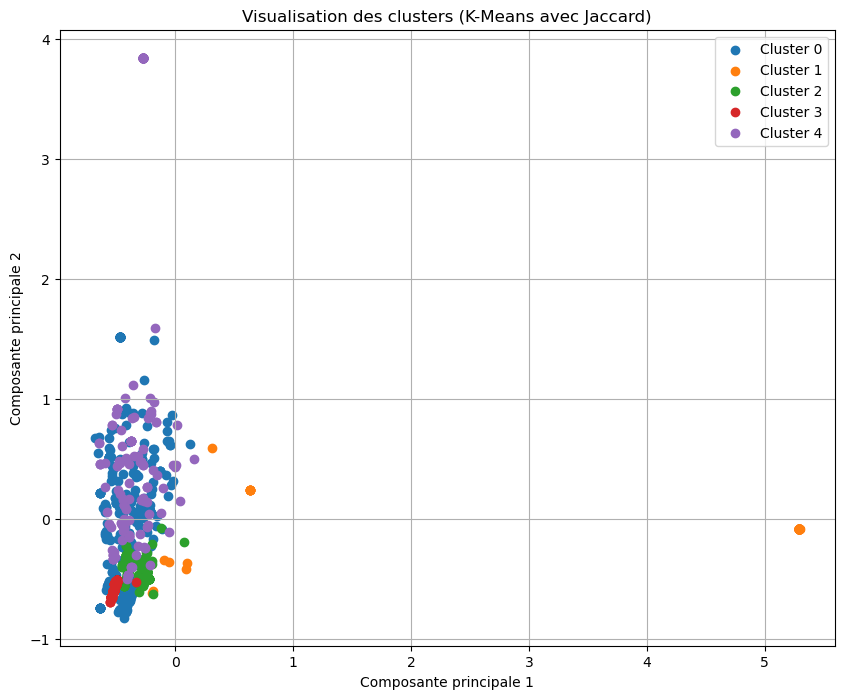

In [65]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour créer un vecteur binaire pour un tweet donné
def create_binary_vector(tweet_tokens, vocab):
    return np.array([int(token in tweet_tokens) for token in vocab], dtype=bool)

# Limiter l'analyse à un sous-ensemble de données
subset_size = 1000
data_subset = data.iloc[:subset_size]  # Prendre les premières lignes (assurez-vous que 'data' est un DataFrame)

# Construire le vocabulaire unique à partir des tokens dans la colonne 'text'
unique_vocab = set()
for tweet in data_subset['text']:
    unique_vocab.update(tweet.split())

# Convertir le vocabulaire en liste pour un ordre fixe
vocab_list = list(unique_vocab)

# Conversion des tweets en vecteurs binaires
binary_vectors = np.array(
    [create_binary_vector(tweet.split(), vocab_list) for tweet in data_subset['text']]
)

# Calculer une matrice de distances de Jaccard
def calculate_jaccard_distances(vectors):
    return pairwise_distances(vectors, metric='jaccard')

# Implémentation K-Means personnalisée avec distance de Jaccard
def custom_kmeans(vectors, num_clusters, max_iterations=100, seed=42):
    np.random.seed(seed)
    n_samples = vectors.shape[0]
    
    # Sélection aléatoire des indices pour initialiser les centroïdes
    centroid_indices = np.random.choice(n_samples, size=num_clusters, replace=False)
    centroids = vectors[centroid_indices]
    
    for iteration in range(max_iterations):
        # Calcul des distances entre les points et les centroïdes
        distances = pairwise_distances(vectors, centroids, metric='jaccard')
        
        # Affectation de chaque point au cluster le plus proche
        cluster_assignments = np.argmin(distances, axis=1)
        
        # Mise à jour des centroïdes
        updated_centroids = []
        for cluster_idx in range(num_clusters):
            cluster_points = vectors[cluster_assignments == cluster_idx]
            if cluster_points.size > 0:
                # Trouver le point médian (minimisant les distances)
                medoid_index = np.argmin(np.sum(pairwise_distances(cluster_points, metric='jaccard'), axis=1))
                updated_centroids.append(cluster_points[medoid_index])
            else:
                # Remplacement aléatoire si le cluster est vide
                updated_centroids.append(vectors[np.random.choice(n_samples)])
        
        updated_centroids = np.array(updated_centroids)
        
        # Vérifier la convergence
        if np.allclose(centroids, updated_centroids):
            break
        centroids = updated_centroids
    
    return cluster_assignments, centroids

# Appliquer K-Means sur les vecteurs binaires
num_clusters = 5
cluster_labels, final_centroids = custom_kmeans(binary_vectors, num_clusters)

# Ajouter les clusters comme nouvelle colonne dans le DataFrame
data_subset['cluster'] = cluster_labels

# Réduction de la dimensionnalité avec PCA pour la visualisation
pca_model = PCA(n_components=2)
vectors_2d = pca_model.fit_transform(binary_vectors)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
for cluster_idx in range(num_clusters):
    points = vectors_2d[data_subset['cluster'] == cluster_idx]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster_idx}")

plt.title("Visualisation des clusters (K-Means avec Jaccard)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()


<h1>k=8

C:\Users\Eyakr\AppData\Local\Temp\ipykernel_16900\1963590667.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = cluster_labels


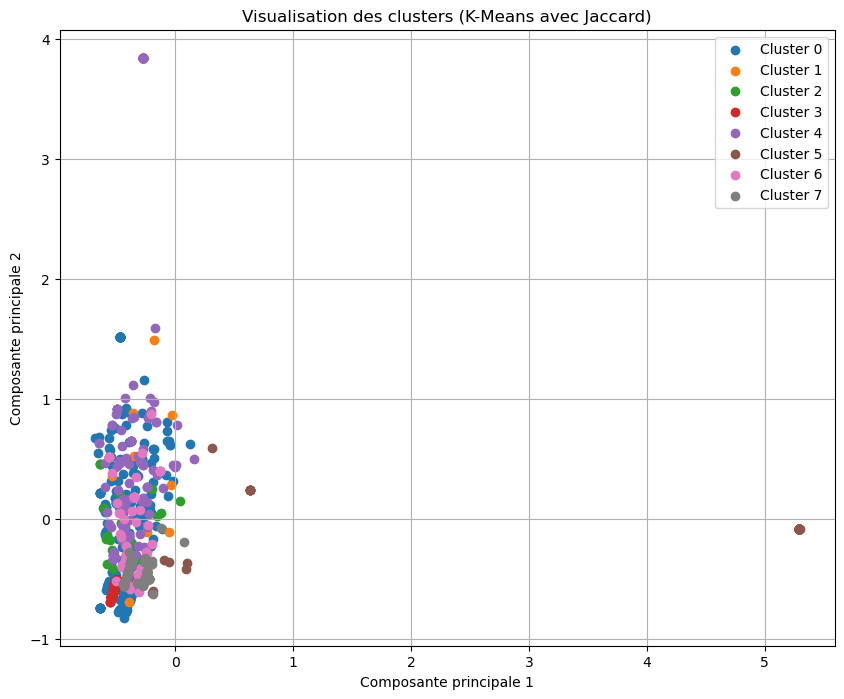

In [67]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour créer un vecteur binaire pour un tweet donné
def create_binary_vector(tweet_tokens, vocab):
    return np.array([int(token in tweet_tokens) for token in vocab], dtype=bool)

# Limiter l'analyse à un sous-ensemble de données
subset_size = 1000
data_subset = data.iloc[:subset_size]  # Prendre les premières lignes (assurez-vous que 'data' est un DataFrame)

# Construire le vocabulaire unique à partir des tokens dans la colonne 'text'
unique_vocab = set()
for tweet in data_subset['text']:
    unique_vocab.update(tweet.split())

# Convertir le vocabulaire en liste pour un ordre fixe
vocab_list = list(unique_vocab)

# Conversion des tweets en vecteurs binaires
binary_vectors = np.array(
    [create_binary_vector(tweet.split(), vocab_list) for tweet in data_subset['text']]
)

# Calculer une matrice de distances de Jaccard
def calculate_jaccard_distances(vectors):
    return pairwise_distances(vectors, metric='jaccard')

# Implémentation K-Means personnalisée avec distance de Jaccard
def custom_kmeans(vectors, num_clusters, max_iterations=100, seed=42):
    np.random.seed(seed)
    n_samples = vectors.shape[0]
    
    # Sélection aléatoire des indices pour initialiser les centroïdes
    centroid_indices = np.random.choice(n_samples, size=num_clusters, replace=False)
    centroids = vectors[centroid_indices]
    
    for iteration in range(max_iterations):
        # Calcul des distances entre les points et les centroïdes
        distances = pairwise_distances(vectors, centroids, metric='jaccard')
        
        # Affectation de chaque point au cluster le plus proche
        cluster_assignments = np.argmin(distances, axis=1)
        
        # Mise à jour des centroïdes
        updated_centroids = []
        for cluster_idx in range(num_clusters):
            cluster_points = vectors[cluster_assignments == cluster_idx]
            if cluster_points.size > 0:
                # Trouver le point médian (minimisant les distances)
                medoid_index = np.argmin(np.sum(pairwise_distances(cluster_points, metric='jaccard'), axis=1))
                updated_centroids.append(cluster_points[medoid_index])
            else:
                # Remplacement aléatoire si le cluster est vide
                updated_centroids.append(vectors[np.random.choice(n_samples)])
        
        updated_centroids = np.array(updated_centroids)
        
        # Vérifier la convergence
        if np.allclose(centroids, updated_centroids):
            break
        centroids = updated_centroids
    
    return cluster_assignments, centroids

# Appliquer K-Means sur les vecteurs binaires
num_clusters = 8
cluster_labels, final_centroids = custom_kmeans(binary_vectors, num_clusters)

# Ajouter les clusters comme nouvelle colonne dans le DataFrame
data_subset['cluster'] = cluster_labels

# Réduction de la dimensionnalité avec PCA pour la visualisation
pca_model = PCA(n_components=2)
vectors_2d = pca_model.fit_transform(binary_vectors)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
for cluster_idx in range(num_clusters):
    points = vectors_2d[data_subset['cluster'] == cluster_idx]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster_idx}")

plt.title("Visualisation des clusters (K-Means avec Jaccard)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()


<h1>k=27

C:\Users\Eyakr\AppData\Local\Temp\ipykernel_16900\995319634.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['cluster'] = cluster_labels


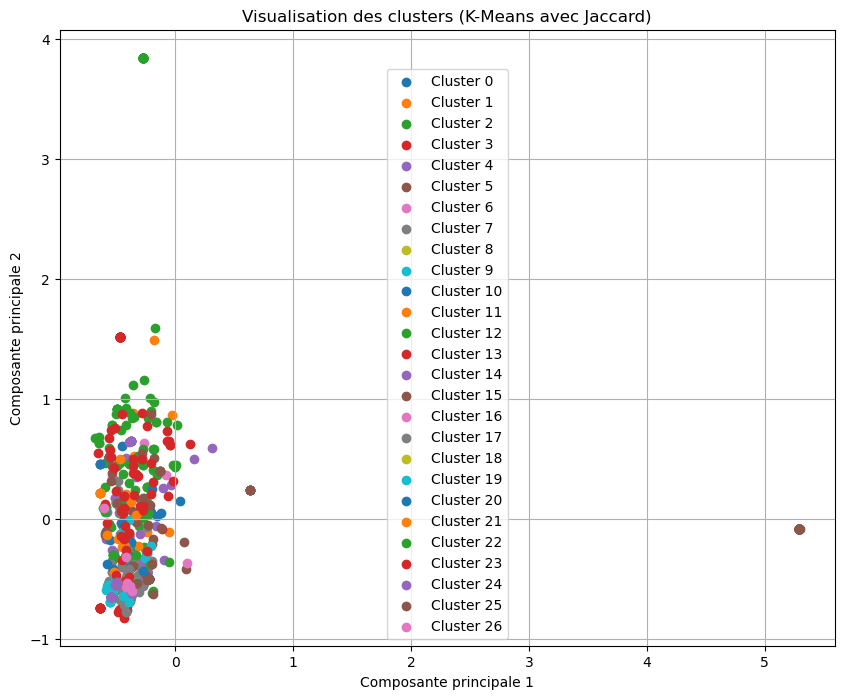

In [69]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour créer un vecteur binaire pour un tweet donné
def create_binary_vector(tweet_tokens, vocab):
    return np.array([int(token in tweet_tokens) for token in vocab], dtype=bool)

# Limiter l'analyse à un sous-ensemble de données
subset_size = 1000
data_subset = data.iloc[:subset_size]  # Prendre les premières lignes (assurez-vous que 'data' est un DataFrame)

# Construire le vocabulaire unique à partir des tokens dans la colonne 'text'
unique_vocab = set()
for tweet in data_subset['text']:
    unique_vocab.update(tweet.split())

# Convertir le vocabulaire en liste pour un ordre fixe
vocab_list = list(unique_vocab)

# Conversion des tweets en vecteurs binaires
binary_vectors = np.array(
    [create_binary_vector(tweet.split(), vocab_list) for tweet in data_subset['text']]
)

# Calculer une matrice de distances de Jaccard
def calculate_jaccard_distances(vectors):
    return pairwise_distances(vectors, metric='jaccard')

# Implémentation K-Means personnalisée avec distance de Jaccard
def custom_kmeans(vectors, num_clusters, max_iterations=100, seed=42):
    np.random.seed(seed)
    n_samples = vectors.shape[0]
    
    # Sélection aléatoire des indices pour initialiser les centroïdes
    centroid_indices = np.random.choice(n_samples, size=num_clusters, replace=False)
    centroids = vectors[centroid_indices]
    
    for iteration in range(max_iterations):
        # Calcul des distances entre les points et les centroïdes
        distances = pairwise_distances(vectors, centroids, metric='jaccard')
        
        # Affectation de chaque point au cluster le plus proche
        cluster_assignments = np.argmin(distances, axis=1)
        
        # Mise à jour des centroïdes
        updated_centroids = []
        for cluster_idx in range(num_clusters):
            cluster_points = vectors[cluster_assignments == cluster_idx]
            if cluster_points.size > 0:
                # Trouver le point médian (minimisant les distances)
                medoid_index = np.argmin(np.sum(pairwise_distances(cluster_points, metric='jaccard'), axis=1))
                updated_centroids.append(cluster_points[medoid_index])
            else:
                # Remplacement aléatoire si le cluster est vide
                updated_centroids.append(vectors[np.random.choice(n_samples)])
        
        updated_centroids = np.array(updated_centroids)
        
        # Vérifier la convergence
        if np.allclose(centroids, updated_centroids):
            break
        centroids = updated_centroids
    
    return cluster_assignments, centroids

# Appliquer K-Means sur les vecteurs binaires
num_clusters = 27
cluster_labels, final_centroids = custom_kmeans(binary_vectors, num_clusters)

# Ajouter les clusters comme nouvelle colonne dans le DataFrame
data_subset['cluster'] = cluster_labels

# Réduction de la dimensionnalité avec PCA pour la visualisation
pca_model = PCA(n_components=2)
vectors_2d = pca_model.fit_transform(binary_vectors)

# Visualisation des clusters
plt.figure(figsize=(10, 8))
for cluster_idx in range(num_clusters):
    points = vectors_2d[data_subset['cluster'] == cluster_idx]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {cluster_idx}")

plt.title("Visualisation des clusters (K-Means avec Jaccard)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.show()


## Clustering avec Fuzzy C-Means

In [71]:
!pip install scikit-fuzzy


In [72]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

<h1>cluser=10

C:\Users\Eyakr\AppData\Local\Temp\ipykernel_16900\521894475.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors


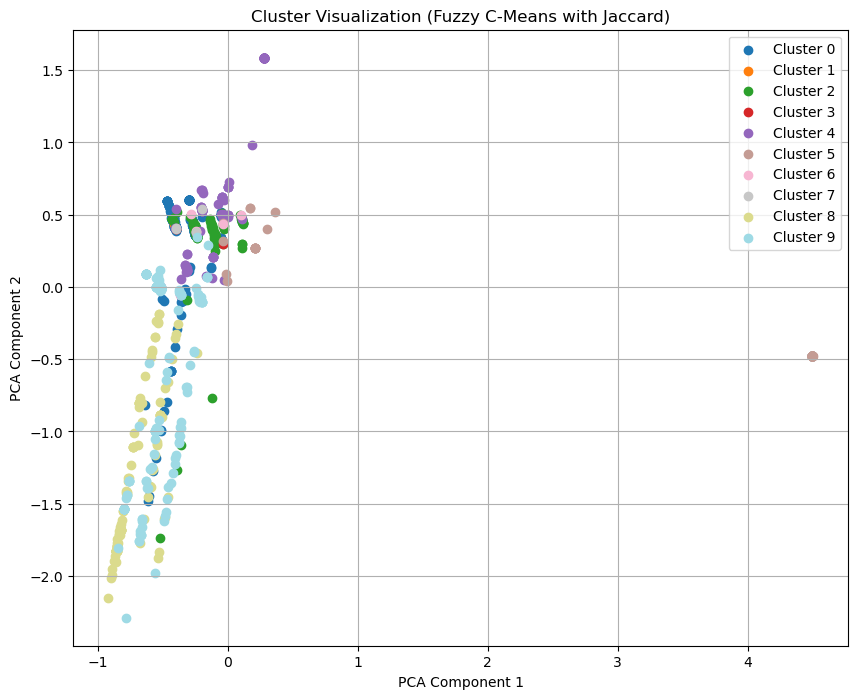

In [74]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming your dataset is data_subset and it has a 'text' column
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(data_subset['text']).toarray()

# Convert data to binary
binary_vectors = (vectors > 0).astype(int)

# Compute Jaccard distance matrix (optional: this line can be skipped as it's not used directly in Fuzzy C-Means)
jaccard_distances = pdist(binary_vectors, metric="jaccard")

# Initialize centroids randomly
num_clusters = 10
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Compute memberships for each data point and cluster
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = np.array([1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                              if np.sum(np.maximum(data[j], centroid)) > 0 else 1 for j in range(num_data)])

        for j in range(num_data):
            memberships[i, j] = 1.0 if distances[j] == 0 else 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))
    return memberships

# Fuzzy C-Means algorithm
max_iterations = 100
tolerance = 1e-5
m = 2

for _ in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    # Convergence check
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Assign final clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

# Generate a color map with enough distinct colors
colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors

# Plot the clusters with custom colors
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", color=colors(cluster))

plt.title("Cluster Visualization (Fuzzy C-Means with Jaccard)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

<h1>cluser=4

C:\Users\Eyakr\AppData\Local\Temp\ipykernel_16900\944492369.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors


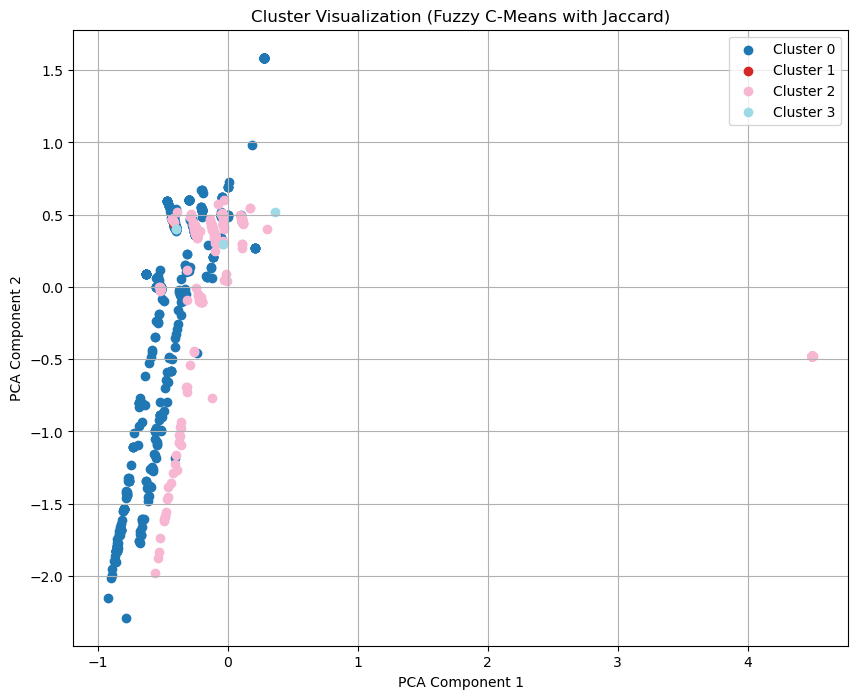

In [76]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming your dataset is data_subset and it has a 'text' column
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(data_subset['text']).toarray()

# Convert data to binary
binary_vectors = (vectors > 0).astype(int)

# Compute Jaccard distance matrix (optional: this line can be skipped as it's not used directly in Fuzzy C-Means)
jaccard_distances = pdist(binary_vectors, metric="jaccard")

# Initialize centroids randomly
num_clusters = 4
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Compute memberships for each data point and cluster
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = np.array([1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                              if np.sum(np.maximum(data[j], centroid)) > 0 else 1 for j in range(num_data)])

        for j in range(num_data):
            memberships[i, j] = 1.0 if distances[j] == 0 else 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))
    return memberships

# Fuzzy C-Means algorithm
max_iterations = 100
tolerance = 1e-5
m = 2

for _ in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    # Convergence check
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Assign final clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

# Generate a color map with enough distinct colors
colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors

# Plot the clusters with custom colors
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", color=colors(cluster))

plt.title("Cluster Visualization (Fuzzy C-Means with Jaccard)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

<h1>cluser=24

C:\Users\Eyakr\AppData\Local\Temp\ipykernel_16900\4018355946.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors


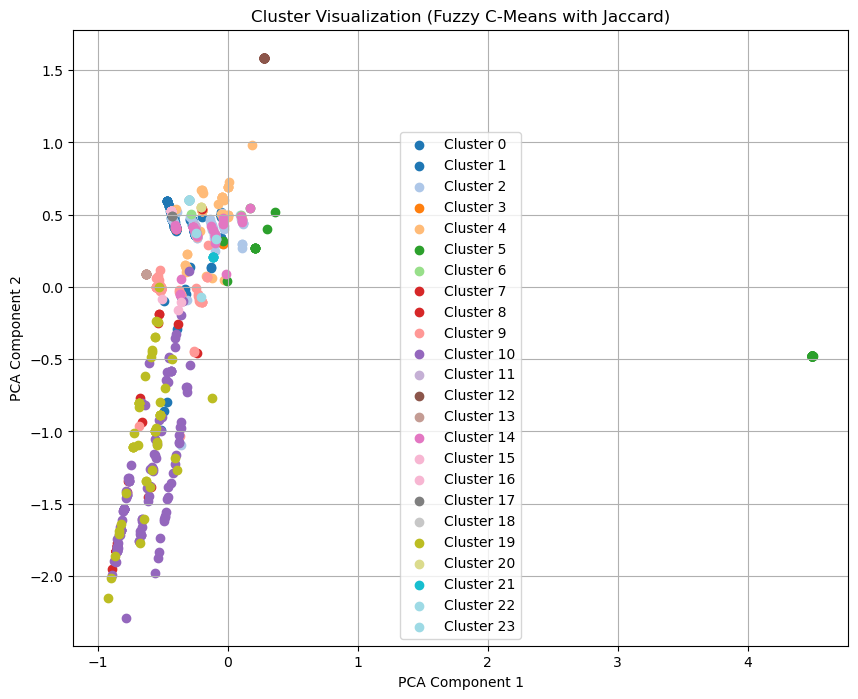

In [78]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming your dataset is data_subset and it has a 'text' column
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(data_subset['text']).toarray()

# Convert data to binary
binary_vectors = (vectors > 0).astype(int)

# Compute Jaccard distance matrix (optional: this line can be skipped as it's not used directly in Fuzzy C-Means)
jaccard_distances = pdist(binary_vectors, metric="jaccard")

# Initialize centroids randomly
num_clusters = 24
np.random.seed(42)
initial_indices = np.random.choice(binary_vectors.shape[0], num_clusters, replace=False)
centroids = binary_vectors[initial_indices]

# Compute memberships for each data point and cluster
def compute_memberships(data, centroids, m=2):
    num_data = data.shape[0]
    num_clusters = centroids.shape[0]
    memberships = np.zeros((num_clusters, num_data))

    for i, centroid in enumerate(centroids):
        distances = np.array([1 - np.sum(np.minimum(data[j], centroid)) / np.sum(np.maximum(data[j], centroid)) 
                              if np.sum(np.maximum(data[j], centroid)) > 0 else 1 for j in range(num_data)])

        for j in range(num_data):
            memberships[i, j] = 1.0 if distances[j] == 0 else 1.0 / np.sum((distances[j] / (distances + 1e-10)) ** (2 / (m - 1)))
    return memberships

# Fuzzy C-Means algorithm
max_iterations = 100
tolerance = 1e-5
m = 2

for _ in range(max_iterations):
    memberships = compute_memberships(binary_vectors, centroids, m)
    new_centroids = np.dot(memberships, binary_vectors) / np.sum(memberships, axis=1, keepdims=True)

    # Convergence check
    if np.linalg.norm(new_centroids - centroids) < tolerance:
        break
    centroids = new_centroids

# Assign final clusters
final_clusters = np.argmax(memberships, axis=0)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(binary_vectors)

# Generate a color map with enough distinct colors
colors = cm.get_cmap('tab20', num_clusters)  # 'tab20' is a color map with 20 distinct colors

# Plot the clusters with custom colors
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_vectors[final_clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", color=colors(cluster))

plt.title("Cluster Visualization (Fuzzy C-Means with Jaccard)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()

## Choisir un tweet par cluster pour K-Means

In [80]:
import numpy as np
from sklearn.cluster import KMeans

# Appliquer K-Means sur les vecteurs de tweets (assurez-vous que 'vectors' est défini)
n_clusters = 5  # Choisissez le nombre de clusters souhaité
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajuster K-Means sur les vecteurs de données (par exemple, vectors)
kmeans.fit(vectors)

# Fonction pour trouver l'index du tweet le plus proche du centroïde
def get_representative_tweets(vectors, labels, centroids):
    representative_tweets = {}
    for cluster in range(len(centroids)):
        # Trouver les indices des tweets appartenant à ce cluster
        cluster_indices = np.where(labels == cluster)[0]
        # Calculer les distances des tweets au centroïde du cluster
        distances = np.linalg.norm(vectors[cluster_indices] - centroids[cluster], axis=1)
        # Trouver l'index du tweet le plus proche
        closest_index = cluster_indices[np.argmin(distances)]
        representative_tweets[cluster] = closest_index
    return representative_tweets

# Trouver les centroïdes et les labels des tweets
labels_kmeans = kmeans.labels_  # Récupérer les labels de cluster de K-Means
centroids_kmeans = kmeans.cluster_centers_  # Récupérer les centroïdes de K-Means

# Obtenir les indices des tweets représentatifs
representative_tweets_kmeans = get_representative_tweets(vectors, labels_kmeans, centroids_kmeans)

# Afficher les tweets représentatifs
print("Tweets représentatifs pour K-Means :")
for cluster, index in representative_tweets_kmeans.items():
    print(f"Cluster {cluster}: {data_subset.iloc[index]['text']}")

Tweets représentatifs pour K-Means :
Cluster 0: RT @jessicard: i hooked up chatgpt to a furby and I think this may be the start of something bad for humanity https://t.co/jximZe2qeG
Cluster 1: ð¥Hey Guys, #ZenithSwap has launched at just $ 55,000 USD Marketcap. The ChatGPT of DEX - Reimagining DeFi with AI-Powered Yield Farming. Now at 4X. Lot of up potential at such low marketcap.ð¥ð $ARB $ZSP #Arbitrum https://t.co/9VWYtYzAJD
Cluster 2: RT @hasantoxr: 15 Best ChatGPT prompts to finish hours of work in seconds: https://t.co/fXk1RX6Eon
Cluster 3: RT @IchiShiogao: ChatGPTã ããããªãèå¨ã®AIãã¼ã«

ãããï¼ã¶æã§ãï¼ï¼ï¼ï¼ãè¶ããAIãã¼ã«ããªãªã¼ã¹ãããï¼ï¼ï¼ï¼å¹´ï¼æã

ç¹ã«æåçãªAIãã¼ã«ããç´¹ä»ãã¾ããããªãã®çç£æ§ãçä¸ãããããã¨ééããªãã

ããã¯ãã¼ã¯å¿é ã§ãð
Cluster 4: RT @CerfiaFR: ð¤ FLASH | GrÃ¢ce Ã  #GTP3 et #GPT4, le robot  @AmecaTheRobot a pu avoir une discuss

## Choisir un tweet par cluster pour c-means fuzzy

In [82]:
import numpy as np

# Exemple d'initialisation de 'u' (fuzzy membership matrix) et 'data_subset' (votre jeu de données)
# Vous devrez remplacer cela par les données appropriées pour votre cas d'utilisation
u = np.random.rand(5, 10)  # Supposons 5 clusters et 10 tweets
u = u / u.sum(axis=0, keepdims=True)  # Normalisation de la matrice (pour être une matrice de probabilité)

# Trouver le tweet avec la probabilité la plus élevée pour chaque cluster
def get_representative_tweets_fuzzy(u, data_subset):
    representative_tweets = {}
    for cluster in range(u.shape[0]):
        # Trouver l'index du tweet avec la probabilité maximale pour ce cluster
        closest_index = np.argmax(u[cluster])  # Trouve l'index du tweet avec la probabilité maximale
        representative_tweets[cluster] = closest_index
    return representative_tweets

# Obtenir les indices des tweets représentatifs pour Fuzzy C-Means
representative_tweets_fuzzy = get_representative_tweets_fuzzy(u, data_subset)

# Afficher les tweets représentatifs
print("\nTweets représentatifs pour Fuzzy C-Means :")
for cluster, index in representative_tweets_fuzzy.items():
    print(f"Cluster {cluster}: {data_subset.iloc[index]['text']}")




Tweets représentatifs pour Fuzzy C-Means :
Cluster 0: Hvorfor vil #ChatGPT spÃ¸ke med Joe Biden men ikke med Xi Jinping? Opplevde det samme med #midjourney. https://t.co/hcJInBvYMG
Cluster 1: RT @igz0: èèãã¸ã§ã³ã»ãã©ã³ã»ãã¤ãã³ã®æ¬ãèª­ãã ãã¨ãããã©ãè³ãã³ã³ãã¥ã¼ã¿ã¼ã®ããã«ãç®è¡çãã§ã¯ãªããçµ±è¨çãã«æå ±ãå¦çãããããè«ççãªä¿¡é ¼æ§ãããã®ã ã¨1958å¹´ã«è¦æãã¦ããã®ããããã

ç¾ä»£äººããã¤ãã³ã«ChatGPTã®ä»çµã¿ãã¬ã¯ãã£ã¼ãã¦ãã³â¦
Cluster 2: ð¥Hey Guys, #ZenithSwap has launched at just $ 55,000 USD Marketcap. The ChatGPT of DEX - Reimagining DeFi with AI-Powered Yield Farming. Now at 4X. Lot of up potential at such low marketcap.ð¥ð $ARB $ZSP #Arbitrum https://t.co/9VWYtYzAJD
Cluster 3: The plagiarism detector will introduce its #AI detection tool tomorrow, hoping to protect academic integrity in a post-#ChatGPT world. 

TheÂ speedy launch and lack